# Regression for Used Car Prices in United States


## Team Background

- Project Grp 08

### Team Members

- Team member 1
    - Name: Richard Anton
    - Email: [rna63@drexel.edu](mailto:rna63@drexel.edu)
    
I am a MS CS student at Drexel. I expect to complete my degree in June 2023 at the end of the next quarter.
I have been a software developer since 1995, and have significant experience with Python.

I have some hands on experience with machine learning, and have taken machine learning, deep learning, artificial intellience, computer vision and DSCI-501 courses at Drexel.

I do not have as much background with exploratory data analysis. I do have a fairly solid mathematical background, including basic statistics.

A number of the prior projects that I have worked on have been focused on classification, for example of images or sentiment analysis of textual data.

Since much of my experience with handling data sets for machine learning problems has been through graduate CS courses, I have implemented them typically without a dependency on anything but NumPy and matplotlib for visualizing results, which means I have limited experience with existing common tools like scikit-learn. 

I am competent at using LaTex, but not an advanced user.

I have significant experience with NumPy and some experience using Pandas. I also have experience with matplotlib for visualizing aspects of data, but less with Seaborn.

The areas and skills I would like to grow through this project are:

1. More hands-on experience with scikit-learn and Pandas libraries.
2. More practice with visualization tools, such as matplotlib and Seaborn.
3. More practical experience with investigating a dataset, i.e. what data cleaning is needed and what relationships can be discovered in the data.
4. Experience with a practical machine learning regression problem.
5. Feature selection techniques to make machine learning problems more effective.

In [1]:
# setup imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

import random



In [2]:
sns.set(style="darkgrid")

In [3]:
from IPython.display import display, HTML

In [4]:
class Heading(object):
    template = """<div style="float: left; padding: 10px;">
    <h{size}>{0}</h{size}>
    </div>"""
    def __init__(self, txt, size):
        self.txt = txt
        self.size = size
        
    def _repr_html_(self):
        return self.template.format(self.txt, size=self.size)
    
    def __repr__(self):
        return self.txt

def show_heading(txt, size=2):
    display(Heading(txt, size=size))

In [147]:
# Set this to False to run full version.
sampled = False

In [148]:
if sampled:
    dataset_path = "craigslist_sampled_cleaned_2023_03_05_19_07_36.csv"
else:  # Full dataset
    dataset_path = "craigslist_full_cleaned_2023_03_12_10_45_22.csv"

target_col = 'price'

In [149]:
# load dataset
orig_df = pd.read_csv(dataset_path)
df = orig_df.copy()
# show a sample for sanity check
df.head()

,price,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6000.0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,az
1,11900.0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,ar
2,21000.0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,fl
3,1500.0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,ma
4,4900.0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,nc


In [150]:
# split into input data and output values
X_all = df.drop(columns=[target_col])
y_all = df[target_col]

show_heading("X", size=2)
display(X_all)
show_heading("y", size=2)
display(y_all)

X

,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,az
1,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,ar
2,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,fl
3,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,ma
4,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393903,2019.000000,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.000000,clean,other,fwd,full-size,sedan,white,wy
393904,2020.000000,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,12029.000000,clean,other,fwd,full-size,sedan,red,wy
393905,2020.000000,cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,4174.000000,clean,other,4wd,full-size,hatchback,white,wy
393906,2018.000000,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.000000,clean,other,fwd,full-size,sedan,silver,wy


y

0          6000.0
1         11900.0
2         21000.0
3          1500.0
4          4900.0
           ...   
393903    23590.0
393904    30590.0
393905    34990.0
393906    28990.0
393907    30590.0
Name: price, Length: 393908, dtype: float64

In [151]:
from sklearn import preprocessing

In [152]:
# determine types of columns
numeric_cols = X_all.select_dtypes(include=['int', 'float']).columns
cat_cols = X_all.select_dtypes(include=['object']).columns
bool_cols = X_all.select_dtypes(include=['bool']).columns

show_heading("Column Types")

for col in X_all.columns:
    print(f"Column '{col}' dtype={X_all[col].dtype}")

print("numeric_cols:", numeric_cols)
print("cat_cols:", cat_cols)
print("bool_cols:", bool_cols)

all_cols = set()
all_cols = all_cols.union(set(numeric_cols))
all_cols = all_cols.union(set(cat_cols))
all_cols = all_cols.union(set(bool_cols))

check_cols = set(X_all.columns)

if all_cols != check_cols:
    print("ERROR! missing columns")
else:
    print("Column typing done.")

all_cols

Column Types

Column 'year' dtype=float64
Column 'make' dtype=object
Column 'model' dtype=object
Column 'condition' dtype=object
Column 'cylinders' dtype=object
Column 'fuel' dtype=object
Column 'odometer' dtype=float64
Column 'title_status' dtype=object
Column 'transmission' dtype=object
Column 'drive' dtype=object
Column 'size' dtype=object
Column 'type' dtype=object
Column 'paint_color' dtype=object
Column 'state' dtype=object
numeric_cols: Index(['year', 'odometer'], dtype='object')
cat_cols: Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')
bool_cols: Index([], dtype='object')
Column typing done.


{'condition',
 'cylinders',
 'drive',
 'fuel',
 'make',
 'model',
 'odometer',
 'paint_color',
 'size',
 'state',
 'title_status',
 'transmission',
 'type',
 'year'}

In [153]:
# uncomment and run this if needed.
!pip install category_encoders

In [154]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

In [155]:
# Convert categorical columns to Pandas category type

cats = X_all.select_dtypes(exclude=np.number).columns.tolist()
print("cats:")
display(cats)
for col in cats:
    X_all[col] = X_all[col].astype('category')

display(X_all.dtypes)
display(X_all.head())

cats:


['make',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

year             float64
make            category
model           category
condition       category
cylinders       category
fuel            category
odometer         float64
title_status    category
transmission    category
drive           category
size            category
type            category
paint_color     category
state           category
dtype: object

,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,az
1,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,ar
2,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,fl
3,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,ma
4,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,nc


## Data Dictionary

These are the columns we used from the Craigslist dataset.

|     Name     |  dtype   | Description | Null % | Notes |
|--------------|----------|--------------|--------------|--------------|
| price | float64 | Listed sale price | 0.0 |  | 
| year | float64 | Year of manufacture | 0.002823 | n/a |
| make | category | Auto manufacturer name | 0.041337 | Renamed from manufacturer |
| model | category | Car model name | 0.012362 | n/a |
| condition | category | Listed condition of vehicle | 0.407852 | n/a |
| cylinders | category | Number of engine cylinders | 0.416225 | n/a |
| fuel | category | Type of fuel used by vehicle (i.e. gas, deisel, electric) | 0.007058 | n/a |
| odometer | float64 | Odometer mileage of vehicle | 0.010307 | n/a |
| title_status | category | Status of vehicle title (i.e. clean, salvage) | 0.019308 | n/a |
| transmission | category | Type of vehicle transmission (i.e. automatic, manual) | 0.005988 | n/a |
| drive | category | Drive type of vehicle (i.e. fwd, 4wd) | 0.305863 | n/a |
| size | category | Size of vehicle(i.e. full-size) | 0.717675 | n/a |
| type | category | Vehicle type, (i.e. sedan,pickup) | 0.217527 | n/a |
| paint_color | category | Exterior paint color of vehicle | 0.305011 | n/a |
| state | category | State of vehicle location(i.e. WA, PI) | 0.000000 | n/a |

### Unused Columns

These columns we dropped after EDA before cleaning the data set.


    'id', 'url', 'region', 'VIN', 'region_url', 'county', 'lat', 'long', 'description', 'image_url', 'posting_date'
    
    
We dropped id, url, VIN, image_url because they are likely unique to each listing and uninformative.

We dropped posting_date because the dataset only has data from a limited time frame so this field is not likely to have a long enough date range to determine things like seasonality.


We dropped the columns region, region_url, county, lat, and long so that we could just use state as a single more easily usable column for the effect of the vehicle location on price.



In [156]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=193)

In [157]:
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [158]:
# TODO: Try LeaveOneOut becuase it makes feature importance output easier.
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[
                                    ("one_hot_encoder", OneHotEncoder(handle_unknown="ignore"), cat_cols),
                                    #("leave_one_out_encoder", ce.LeaveOneOutEncoder(return_df=False), cat_cols),
                                    ('scale_data', StandardScaler(), numeric_cols)
                                ])

In [159]:
# This command will try to get an up to date version.
#!pip install --user --upgrade xgboost
!pip install --user xgboost

In [160]:
import xgboost as xgb

In [161]:
# on the Mac GPUs (at least on my M2 macbook air), the CUDA libraries that XGBoost uses do not support the GPU.
# This means we are stuck with CPU for XGBoost or run it on something else.
import platform
platform.processor()
plat = platform.system()
print("Platform: ", plat)

Platform:  Darwin


In [162]:
# hyperparameters for XGBoost

# If you have GPU support, enable with this.
# params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
params = {}
params['objective'] = "reg:squarederror"
#params['learning_rate'] = .01 # learning_rate

# TODO: set learning rate higher and rerun
params['learning_rate'] = .1 # learning_rate

# TODO: experiment if time with gamma, max_depth, etc.

In [163]:
# Setup pipelines for comparison

linear_pipeline = Pipeline(steps=[
                                  ('pre_processing',pre_process),
                                  ('reg', LinearRegression())
                                 ])

ridge_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 
                                 ('reg', SGDRegressor(penalty="l2"))
                                 ])

lasso_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('reg', SGDRegressor(penalty="l1"))
                                 ])


rf_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('reg', RandomForestRegressor(max_depth=10,random_state=191))
                                 ])

# NOTE: Add tree_method="gpu_hist" here as well if supported and desired.
xgb_reg = xgb.XGBRegressor(objective=params['objective'], learning_rate=params['learning_rate'])

xgb_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('reg', xgb_reg)
                                 ])

pipelines = {
    'linear':linear_pipeline,
    'ridge': ridge_pipeline,
    'lasso': lasso_pipeline,
    'random_forest': rf_pipeline,
    'xgboost': xgb_pipeline
}


In [164]:
from sklearn.model_selection import cross_validate

In [165]:
def cross_validate_pipeline(label, pipeline):    
    # scoring = "neg_mean_absolute_percentage_error"
    scoring = "neg_mean_squared_error"
    n_cv_folds = 3

    print("cross validate for:", label)
    result = cross_validate(pipeline, X_all, y_all, cv=n_cv_folds, scoring=scoring)
    display(result)

    return result

In [166]:
def plot_residuals(predict_train, predict_test):

    plt.scatter(
        predict_train,
        predict_train - y_train,
        c='blue',
        marker='o',
        label='Training data')

    plt.scatter(
        predict_test,
        predict_test - y_test,
        c='lightgreen',
        marker='s',
        label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-15000, xmax=55000, lw=2, color='red')
    
    plt.tight_layout()
    plt.show()

In [167]:
def show_samples(X_vals, y_vals, predictions):
    samples = X_vals.copy()
    samples[target_col] = y_vals
    samples['predicted_price'] = predictions
    display(samples)


In [168]:
from sklearn.metrics import r2_score

def score_pipeline(pipeline):
    predict_train = pipeline.predict(X_train)
    predict_test = pipeline.predict(X_test)
    
    score = pipeline.score(X_test, y_test)
    r2 = r2_score(y_test, predict_test)
    # r2 == https://en.wikipedia.org/wiki/Coefficient_of_determination
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
    
    train_rmse = mean_squared_error(y_train, predict_train)**(0.5)
    test_rmse = mean_squared_error(y_test, predict_test)**(0.5)
    
    print('RMSE of train data: ', train_rmse)
    print('RMSE of test data: ',  test_rmse)
    print("model score: %.3f" % score)  # r2 anyway
    print("R2 score", r2)
    
    scores = {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'score': score,
        'r2_score': r2, 
    }
    results = {
        'scores':scores,
        'predict_train': predict_train,
        'predict_test': predict_test
    }
    print("scores:", scores)
    return results

In [169]:
import joblib
from datetime import datetime

def save_model(model_name, model, use_ts=True):
    if use_ts:
        rn = datetime.now()
        dts = '_' + rn.strftime("%Y_%m_%d_%H_%M_%S")
    else:
        dts = ''

    dest_path = f"model_{model_name}{dts}.pkl"
    print(f"Saving model to {dest_path}")
    joblib.dump(model, dest_path)
    
    return dest_path

def load_model(model_path):
    print(f"Loading model from {model_path}")
    model = joblib.load(model_path)
    return model

In [170]:
def eval_pipeline(label, pipeline):
    cross_validate_pipeline(label, pipeline)
    
    rmod = pipeline.fit(X_train,y_train)
    display(rmod)
    
    results = score_pipeline(pipeline)
     
    show_samples(X_test, y_test, results['predict_test'])
    plot_residuals(results['predict_train'], results['predict_test'])
    
    return rmod, results

Evaluating linear

cross validate for: linear


{'fit_time': array([7.74600816, 9.27507305, 8.51029515]),
 'score_time': array([0.17091608, 0.16901398, 0.16779995]),
 'test_score': array([-7.19701281e+07, -1.35943948e+08, -1.66982678e+08])}

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', LinearRegression())])

RMSE of train data:  6456.24166019595
RMSE of test data:  7201.659534204902
model score: 0.744
R2 score 0.7436947354564545
scores: {'train_rmse': 6456.24166019595, 'test_rmse': 7201.659534204902, 'score': 0.7436947354564545, 'r2_score': 0.7436947354564545}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
373916,2017.0,ford,edge sel awd gas suv auto,good,6 cylinders,gas,28669.0,clean,automatic,4wd,full-size,SUV,white,wa,25999.0,25377.851460
379496,2018.0,mitsubishi,outlander,good,6 cylinders,gas,76935.0,clean,automatic,4wd,full-size,SUV,black,wa,18999.0,19616.974809
99114,2011.0,chevrolet,impala,fair,6 cylinders,gas,172000.0,clean,automatic,4wd,full-size,sedan,white,fl,3800.0,2979.288157
359203,2018.0,nissan,frontier,excellent,6 cylinders,gas,55020.0,clean,automatic,4wd,mid-size,pickup,red,vt,23998.0,23816.293046
105068,2012.0,hyundai,veloster,good,4 cylinders,gas,170000.0,clean,automatic,fwd,full-size,sedan,white,fl,1495.0,81.927880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245394,2011.0,kia,sorento,like new,6 cylinders,gas,132000.0,clean,automatic,4wd,full-size,SUV,white,ny,8950.0,7414.851403
137137,2015.0,gmc,terrain,good,4 cylinders,gas,90927.0,clean,automatic,fwd,full-size,SUV,grey,il,11495.0,13896.115024
75433,2008.0,ford,focus,good,4 cylinders,gas,130000.0,clean,automatic,fwd,full-size,sedan,silver,ct,3300.0,209.372351
222443,2004.0,ford,f-150,excellent,8 cylinders,gas,174000.0,clean,automatic,4wd,full-size,pickup,white,nc,10500.0,13669.965710


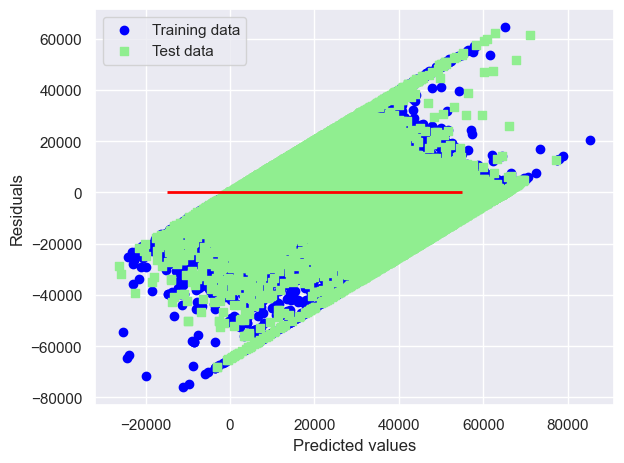

Evaluating ridge

cross validate for: ridge


{'fit_time': array([21.4113462 , 27.3108182 , 21.09919405]),
 'score_time': array([0.17091584, 0.17238188, 0.1687088 ]),
 'test_score': array([-76780841.7461548 , -59177838.28579742, -71429251.91031095])}

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', SGDRegressor())])

RMSE of train data:  7907.136351741322
RMSE of test data:  8005.143497148431
model score: 0.683
R2 score 0.6833127361597395
scores: {'train_rmse': 7907.136351741322, 'test_rmse': 8005.143497148431, 'score': 0.6833127361597395, 'r2_score': 0.6833127361597395}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
373916,2017.0,ford,edge sel awd gas suv auto,good,6 cylinders,gas,28669.0,clean,automatic,4wd,full-size,SUV,white,wa,25999.0,30845.320967
379496,2018.0,mitsubishi,outlander,good,6 cylinders,gas,76935.0,clean,automatic,4wd,full-size,SUV,black,wa,18999.0,21370.766040
99114,2011.0,chevrolet,impala,fair,6 cylinders,gas,172000.0,clean,automatic,4wd,full-size,sedan,white,fl,3800.0,2695.639537
359203,2018.0,nissan,frontier,excellent,6 cylinders,gas,55020.0,clean,automatic,4wd,mid-size,pickup,red,vt,23998.0,23855.584074
105068,2012.0,hyundai,veloster,good,4 cylinders,gas,170000.0,clean,automatic,fwd,full-size,sedan,white,fl,1495.0,-1368.226212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245394,2011.0,kia,sorento,like new,6 cylinders,gas,132000.0,clean,automatic,4wd,full-size,SUV,white,ny,8950.0,8688.325767
137137,2015.0,gmc,terrain,good,4 cylinders,gas,90927.0,clean,automatic,fwd,full-size,SUV,grey,il,11495.0,12915.583157
75433,2008.0,ford,focus,good,4 cylinders,gas,130000.0,clean,automatic,fwd,full-size,sedan,silver,ct,3300.0,-192.206876
222443,2004.0,ford,f-150,excellent,8 cylinders,gas,174000.0,clean,automatic,4wd,full-size,pickup,white,nc,10500.0,16002.159959


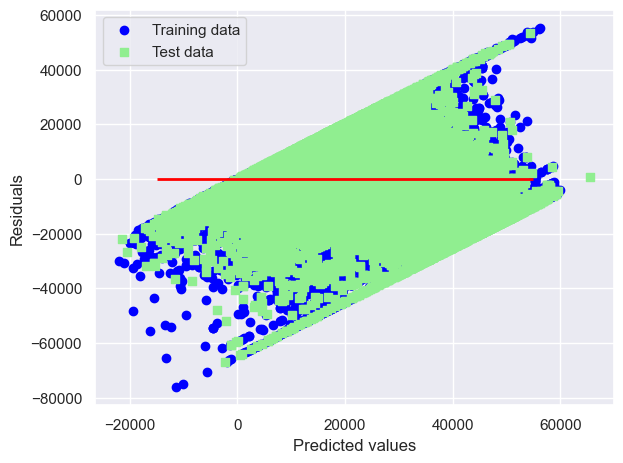

Evaluating lasso

cross validate for: lasso


/opt/homebrew/Caskroom/miniconda/base/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


{'fit_time': array([50.88446617, 52.04952121, 50.48047185]),
 'score_time': array([0.18184304, 0.17530584, 0.16962504]),
 'test_score': array([-72519974.89101365, -55927911.46103492, -66263731.81207873])}

/opt/homebrew/Caskroom/miniconda/base/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', SGDRegressor(penalty='l1'))])

RMSE of train data:  7302.201293002458
RMSE of test data:  7510.748041803154
model score: 0.721
R2 score 0.7212218436805804
scores: {'train_rmse': 7302.201293002458, 'test_rmse': 7510.748041803154, 'score': 0.7212218436805804, 'r2_score': 0.7212218436805804}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
373916,2017.0,ford,edge sel awd gas suv auto,good,6 cylinders,gas,28669.0,clean,automatic,4wd,full-size,SUV,white,wa,25999.0,28871.627643
379496,2018.0,mitsubishi,outlander,good,6 cylinders,gas,76935.0,clean,automatic,4wd,full-size,SUV,black,wa,18999.0,20363.387891
99114,2011.0,chevrolet,impala,fair,6 cylinders,gas,172000.0,clean,automatic,4wd,full-size,sedan,white,fl,3800.0,2387.100820
359203,2018.0,nissan,frontier,excellent,6 cylinders,gas,55020.0,clean,automatic,4wd,mid-size,pickup,red,vt,23998.0,23741.678491
105068,2012.0,hyundai,veloster,good,4 cylinders,gas,170000.0,clean,automatic,fwd,full-size,sedan,white,fl,1495.0,-1242.689312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245394,2011.0,kia,sorento,like new,6 cylinders,gas,132000.0,clean,automatic,4wd,full-size,SUV,white,ny,8950.0,8178.401650
137137,2015.0,gmc,terrain,good,4 cylinders,gas,90927.0,clean,automatic,fwd,full-size,SUV,grey,il,11495.0,12953.995306
75433,2008.0,ford,focus,good,4 cylinders,gas,130000.0,clean,automatic,fwd,full-size,sedan,silver,ct,3300.0,-253.622649
222443,2004.0,ford,f-150,excellent,8 cylinders,gas,174000.0,clean,automatic,4wd,full-size,pickup,white,nc,10500.0,15107.859594


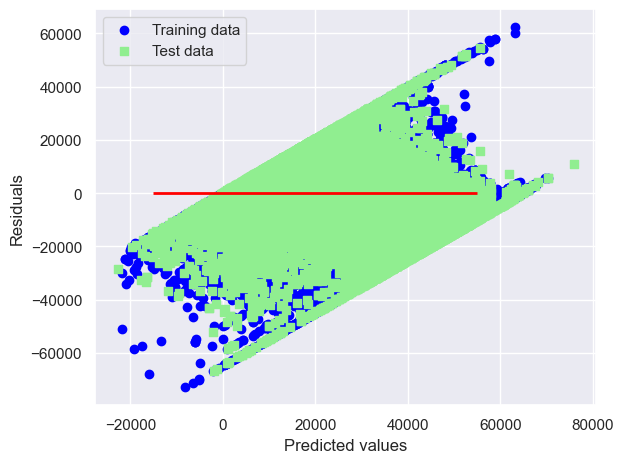

Evaluating random_forest

cross validate for: random_forest


{'fit_time': array([125.77449322, 127.23792672, 123.58190799]),
 'score_time': array([0.78742886, 0.77448702, 0.77283287]),
 'test_score': array([-73128326.53795086, -57013734.37640717, -68708431.26695243])}

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', RandomForestRegressor(max_depth=10, random_state=191))])

RMSE of train data:  7716.302885302759
RMSE of test data:  7831.58202896849
model score: 0.697
R2 score 0.6968962165516847
scores: {'train_rmse': 7716.302885302759, 'test_rmse': 7831.58202896849, 'score': 0.6968962165516847, 'r2_score': 0.6968962165516847}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
373916,2017.0,ford,edge sel awd gas suv auto,good,6 cylinders,gas,28669.0,clean,automatic,4wd,full-size,SUV,white,wa,25999.0,29906.533979
379496,2018.0,mitsubishi,outlander,good,6 cylinders,gas,76935.0,clean,automatic,4wd,full-size,SUV,black,wa,18999.0,22592.897989
99114,2011.0,chevrolet,impala,fair,6 cylinders,gas,172000.0,clean,automatic,4wd,full-size,sedan,white,fl,3800.0,10174.097273
359203,2018.0,nissan,frontier,excellent,6 cylinders,gas,55020.0,clean,automatic,4wd,mid-size,pickup,red,vt,23998.0,29105.598735
105068,2012.0,hyundai,veloster,good,4 cylinders,gas,170000.0,clean,automatic,fwd,full-size,sedan,white,fl,1495.0,6127.289598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245394,2011.0,kia,sorento,like new,6 cylinders,gas,132000.0,clean,automatic,4wd,full-size,SUV,white,ny,8950.0,10967.242632
137137,2015.0,gmc,terrain,good,4 cylinders,gas,90927.0,clean,automatic,fwd,full-size,SUV,grey,il,11495.0,11740.977672
75433,2008.0,ford,focus,good,4 cylinders,gas,130000.0,clean,automatic,fwd,full-size,sedan,silver,ct,3300.0,6189.568493
222443,2004.0,ford,f-150,excellent,8 cylinders,gas,174000.0,clean,automatic,4wd,full-size,pickup,white,nc,10500.0,7244.964194


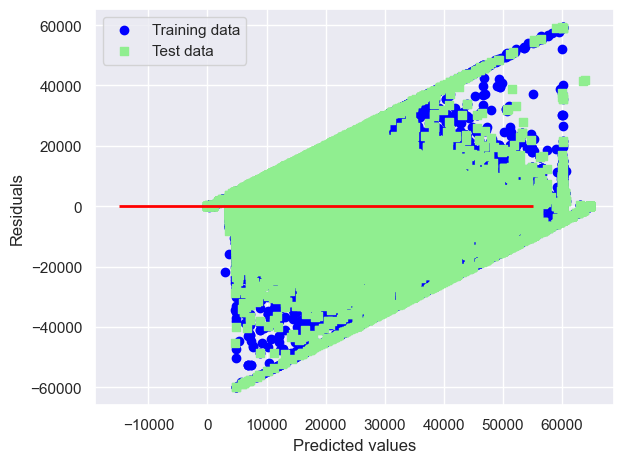

Evaluating xgboost

cross validate for: xgboost


{'fit_time': array([11.75641513, 12.30671692, 12.48168778]),
 'score_time': array([0.28955007, 0.28798318, 0.27028298]),
 'test_score': array([-64651435.74595511, -49465857.4873107 , -60505184.96020123])}

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'],...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

RMSE of train data:  7205.703605739504
RMSE of test data:  7282.552914813378
model score: 0.738
R2 score 0.7379044466385438
scores: {'train_rmse': 7205.703605739504, 'test_rmse': 7282.552914813378, 'score': 0.7379044466385438, 'r2_score': 0.7379044466385438}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
373916,2017.0,ford,edge sel awd gas suv auto,good,6 cylinders,gas,28669.0,clean,automatic,4wd,full-size,SUV,white,wa,25999.0,31412.423828
379496,2018.0,mitsubishi,outlander,good,6 cylinders,gas,76935.0,clean,automatic,4wd,full-size,SUV,black,wa,18999.0,22732.115234
99114,2011.0,chevrolet,impala,fair,6 cylinders,gas,172000.0,clean,automatic,4wd,full-size,sedan,white,fl,3800.0,6549.604492
359203,2018.0,nissan,frontier,excellent,6 cylinders,gas,55020.0,clean,automatic,4wd,mid-size,pickup,red,vt,23998.0,31460.048828
105068,2012.0,hyundai,veloster,good,4 cylinders,gas,170000.0,clean,automatic,fwd,full-size,sedan,white,fl,1495.0,5995.744141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245394,2011.0,kia,sorento,like new,6 cylinders,gas,132000.0,clean,automatic,4wd,full-size,SUV,white,ny,8950.0,8517.036133
137137,2015.0,gmc,terrain,good,4 cylinders,gas,90927.0,clean,automatic,fwd,full-size,SUV,grey,il,11495.0,11805.036133
75433,2008.0,ford,focus,good,4 cylinders,gas,130000.0,clean,automatic,fwd,full-size,sedan,silver,ct,3300.0,4459.783203
222443,2004.0,ford,f-150,excellent,8 cylinders,gas,174000.0,clean,automatic,4wd,full-size,pickup,white,nc,10500.0,7714.759277


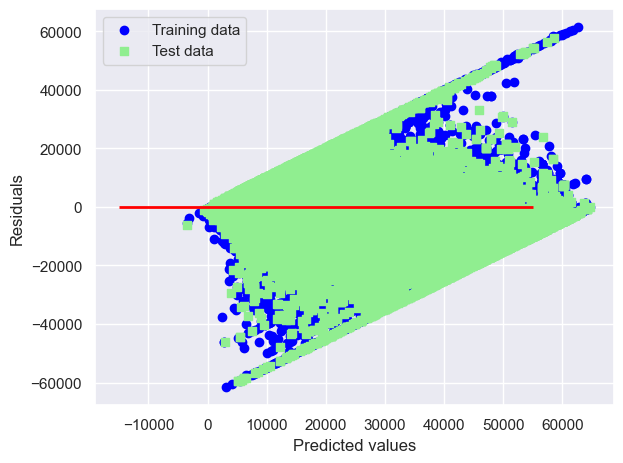

In [171]:
all_results = []
for label, pipeline in pipelines.items():
    show_heading(f"Evaluating {label}", 2)
    rmod, results = eval_pipeline(label, pipeline)
    scores = {'label': label}
    scores.update(results['scores'])
    all_results.append(scores)

In [172]:
df = pd.DataFrame.from_dict(all_results)

show_heading("Pipeline Score Summary")
display(df)

Pipeline Score Summary

,label,train_rmse,test_rmse,score,r2_score
0,linear,6456.241660,7201.659534,0.743695,0.743695
1,ridge,7907.136352,8005.143497,0.683313,0.683313
2,lasso,7302.201293,7510.748042,0.721222,0.721222
3,random_forest,7716.302885,7831.582029,0.696896,0.696896
4,xgboost,7205.703606,7282.552915,0.737904,0.737904


In [173]:
def plot_evals_result(results):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    x = None
    
    lines = {}
    for key, values in results.items():
        print("key:", key)
        if x is None:
            n_rounds = len(values)
            x = np.linspace(0, n_rounds, n_rounds)
            
        lines[key],  = ax.plot(x, values, label=key)
        ax.legend()

    plt.show()
    

In [174]:
# Callback for xgboost to save error metrics by epoch.
class EvalCapture(xgb.callback.TrainingCallback):
    
    def __init__(self, rounds):
        self.rounds = rounds
        self.lines = {}
        self.x = np.linspace(0, self.rounds, self.rounds)
        self.evals_log = None
        
    def _get_key(self, data, metric):
        return f'{data}-{metric}'

    def evals_result(self):
        # return results as dict of array of values for each round.
        results = {}
        
        #display(self.evals_log) # TODO:
        for data, metric in self.evals_log.items():
            for metric_name, log in metric.items():
                key = self._get_key(data, metric_name)
                results[key] = log
        return results
         
    def after_iteration(self, model, epoch, evals_log):
        # Keep most recent log
        self.evals_log = evals_log
        return False

In [175]:
def xgboost_fit(X_train, y_train, X_test, y_test, enable_cat, n_rounds = 5000):
    # This is the non pipeline version for helping with measuring feature importance.

    # Convert to the format XGBoost lib expects.
    dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=enable_cat)
    dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=enable_cat)

    evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]

    evals_capture = EvalCapture(n_rounds)
    
    model = xgb.train(
      params=params,
      dtrain=dtrain_reg,
      num_boost_round=n_rounds,
      evals=evals,
      verbose_eval=50, # print every N rounds
      early_stopping_rounds=10,  # stop if no improvement to validation loss in N rounds.
      callbacks=[evals_capture]
    )

    evals_result = evals_capture.evals_result()
    plot_evals_result(evals_result)
    
    predict_test = model.predict(dtest_reg)
    predict_train = model.predict(dtrain_reg)
    
    print('RMSE of train data: ', mean_squared_error(y_train, predict_train)**(0.5))
    print('RMSE of test data: ',  mean_squared_error(y_test, predict_test)**(0.5))

    r2 = r2_score(y_test, predict_test)
    print('R2 Score of test data:', r2)
        
    return model
# xgboost_fit() 

[0]	validation-rmse:21506.06850	train-rmse:21473.05728
[50]	validation-rmse:7405.14124	train-rmse:7350.43879
[100]	validation-rmse:6885.74852	train-rmse:6788.29061
[150]	validation-rmse:6568.69173	train-rmse:6433.51677
[200]	validation-rmse:6361.39670	train-rmse:6191.37124
[250]	validation-rmse:6180.09548	train-rmse:5982.03080
[300]	validation-rmse:6057.67012	train-rmse:5829.45186
[350]	validation-rmse:5954.23915	train-rmse:5694.88588
[400]	validation-rmse:5874.84722	train-rmse:5586.49558
[450]	validation-rmse:5796.50370	train-rmse:5483.77520
[500]	validation-rmse:5725.34584	train-rmse:5387.26849
[550]	validation-rmse:5656.93925	train-rmse:5295.16699
[600]	validation-rmse:5609.92662	train-rmse:5226.71911
[650]	validation-rmse:5548.68746	train-rmse:5140.60363
[700]	validation-rmse:5505.10364	train-rmse:5075.13851
[750]	validation-rmse:5460.27653	train-rmse:5007.58379
[800]	validation-rmse:5413.77499	train-rmse:4943.81323
[850]	validation-rmse:5379.09820	train-rmse:4888.61935
[900]	valid

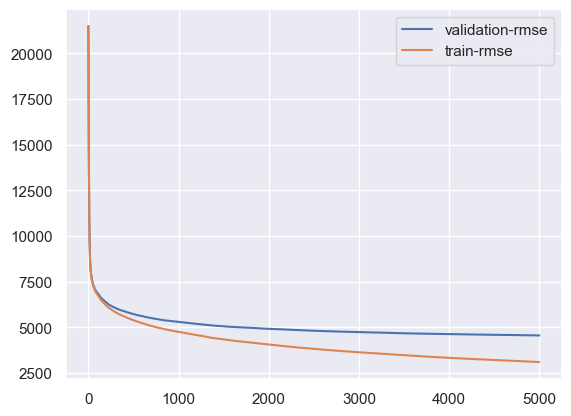

RMSE of train data:  3097.428905862092
RMSE of test data:  4552.947838333572
R2 Score of test data: 0.8975580811572008


In [176]:
# Train a separate model to do feature importance
model = xgboost_fit(X_train, y_train, X_test, y_test, enable_cat=True) 


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

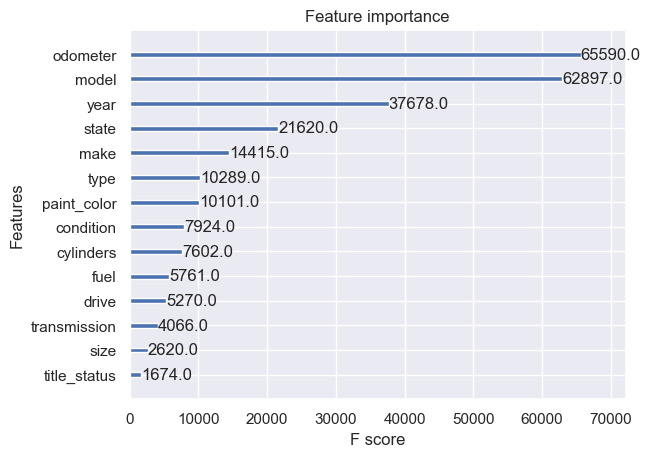

In [177]:
n_features_max = 50

from xgboost import plot_importance
plot_importance(model, max_num_features=20)

In [178]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
    
n_pca_comp = 10

# Using LeaveOneOut and PCA
cat_encoder = Pipeline([
    ('LOO', ce.LeaveOneOutEncoder(return_df=False)),
    ('PCA', PCA(n_components = n_pca_comp,random_state=193))
])

alt_pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[
                                    #("leave_one_out_encoder", ce.LeaveOneOutEncoder(return_df=False), cat_cols),
                                    ("cat_encoder", cat_encoder, cat_cols),
                                    ('scale_data', StandardScaler(), numeric_cols),
                                ])

In [179]:
def train_random_forest(xreg_train, yreg_train, xreg_test, yreg_test):


    RF_regressor = Pipeline([('pre_processing',alt_pre_process),
                             ('reg', RandomForestRegressor(max_depth=15,random_state=191))])

    RF_regressor.fit(xreg_train, yreg_train)

    predict_train = RF_regressor.predict(xreg_train)
    predict_test = RF_regressor.predict(xreg_test)

    train_rmse = mean_squared_error(yreg_train, predict_train)**(0.5)
    test_rmse = mean_squared_error(yreg_test, predict_test)**(0.5)
  
    score = RF_regressor.score(X_test, y_test)
    r2 = r2_score(y_test, predict_test)
    
    train_rmse = mean_squared_error(y_train, predict_train)**(0.5)
    test_rmse = mean_squared_error(y_test, predict_test)**(0.5)
    
    print('RMSE of train data: ', train_rmse)
    print('RMSE of test data: ',  test_rmse)
    print("model score: %.3f" % score)
    print("R2 score", r2)
    
    
    return RF_regressor


In [180]:
print("Random Forest")
train_random_forest(X_train, y_train, X_test, y_test)    


Random Forest
RMSE of train data:  4810.785364020331
RMSE of test data:  5715.183210629658
model score: 0.839
R2 score 0.8385817371382678


Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_encoder',
                                                  Pipeline(steps=[('LOO',
                                                                   LeaveOneOutEncoder(return_df=False)),
                                                                  ('PCA',
                                                                   PCA(n_components=10,
                                                                       random_state=193))]),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', RandomForestRegressor(max_depth=15, random_state=191))])

In [181]:
def score_xgb_model(X_train, y_train, X_test, y_test):
    n_rounds = 5000    
    xgb_model = xgboost_fit(X_train, y_train, X_test, y_test, enable_cat=False, n_rounds=n_rounds) 
    return xgb_model

In [ ]:
print("XGBoost")

alt_pre_process.fit(X_train, y_train)

X_pre_train =  alt_pre_process.transform(X_train)
X_pre_test =  alt_pre_process.transform(X_test)

xgb_model = score_xgb_model(X_pre_train, y_train, X_pre_test, y_test)

XGBoost
[0]	validation-rmse:21393.89691	train-rmse:21347.82891
[50]	validation-rmse:6575.08259	train-rmse:6265.55465
[100]	validation-rmse:6371.88206	train-rmse:6029.40295
[150]	validation-rmse:6261.56595	train-rmse:5881.05271
[200]	validation-rmse:6181.25838	train-rmse:5762.23117
[250]	validation-rmse:6111.73536	train-rmse:5655.58060
[300]	validation-rmse:6052.78804	train-rmse:5565.38557
[350]	validation-rmse:6015.75131	train-rmse:5500.14028
[400]	validation-rmse:5962.05489	train-rmse:5413.85683
[450]	validation-rmse:5917.03095	train-rmse:5336.37495
[500]	validation-rmse:5880.93249	train-rmse:5275.08400
[550]	validation-rmse:5850.75523	train-rmse:5218.23785
[600]	validation-rmse:5817.25672	train-rmse:5155.51112
[650]	validation-rmse:5788.28259	train-rmse:5101.94557
[700]	validation-rmse:5764.02678	train-rmse:5054.45397


In [ ]:
# save the model
save_model("xgboost", model, use_ts=True)